<a href="https://colab.research.google.com/github/AmyMorrison2/Capstone/blob/main/Copy_of_CAPSTONE_DELIVERABLE_MORRISON_LINEAR_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Milestone--Data Acquisition

import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# define index names: ^DJI = DOW Jones, ^GSPC = S&P 500, ^IXIC=NASDAQ 100, ^RUT = Russell 2000
index_names = ['^DJI','^GSPC','^IXIC', '^RUT']

# define date range (2018-2023 to examine trends across 6 year-period which contains the time frame of the crash)
start_date_string = "2018-01-01"
end_date_string = "2023-12-31"

# pull data from Yahoo Finance
raw_data = yf.download(index_names, start=start_date_string, end=end_date_string)

[*********************100%%**********************]  4 of 4 completed


In [ ]:
# keep both adjusted closing prices and volume
df_subset = raw_data[['Adj Close', 'Volume']].dropna(axis='rows')

# examine new dataset
df_subset

Price          Adj Close                                             Volume  \
Ticker              ^DJI        ^GSPC         ^IXIC         ^RUT       ^DJI   
Date                                                                          
2018-01-02  24824.009766  2695.810059   7006.899902  1550.010010  341130000   
2018-01-03  24922.679688  2713.060059   7065.529785  1552.579956  456790000   
2018-01-04  25075.130859  2723.989990   7077.910156  1555.719971  403280000   
2018-01-05  25295.869141  2743.149902   7136.560059  1560.010010  358020000   
2018-01-08  25283.000000  2747.709961   7157.390137  1561.810059  341390000   
...                  ...          ...           ...          ...        ...   
2023-12-22  37385.968750  4754.629883  14992.969727  2033.959961  252970000   
2023-12-26  37545.328125  4774.750000  15074.570312  2059.189941  212420000   
2023-12-27  37656.519531  4781.580078  15099.179688  2066.209961  245530000   
2023-12-28  37710.101562  4783.350098  15095.139648  2058.340088  199550000   
2023-12-29  37689.539062  4769.830078  15011.349609  2027.069946  234570000   

Price                                           
Ticker           ^GSPC       ^IXIC        ^RUT  
Date                                            
2018-01-02  3397430000  1929700000  3397430000  
2018-01-03  3544030000  2173130000  3544030000  
2018-01-04  3697340000  2103220000  3697340000  
2018-01-05  3239280000  2024000000  3239280000  
2018-01-08  3246160000  2055010000  3246160000  
...                ...         ...         ...  
2023-12-22  3046770000  4796600000  3046770000  
2023-12-26  2513910000  6120600000  2513910000  
2023-12-27  2748450000  7480170000  2748450000  
2023-12-28  2698860000  5090570000  2698860000  
2023-12-29  3126060000  5441060000  3126060000  

[1509 rows x 8 columns]

In [ ]:
# remove '^' from the second level
df_subset.columns = pd.MultiIndex.from_tuples([(x[0], x[1].replace('^', '')) if '^' in x[1] else x for x in df_subset.columns])

df_subset.head()


Adj Close                                            Volume  \
                     DJI         GSPC         IXIC          RUT        DJI   
Date                                                                         
2018-01-02  24824.009766  2695.810059  7006.899902  1550.010010  341130000   
2018-01-03  24922.679688  2713.060059  7065.529785  1552.579956  456790000   
2018-01-04  25075.130859  2723.989990  7077.910156  1555.719971  403280000   
2018-01-05  25295.869141  2743.149902  7136.560059  1560.010010  358020000   
2018-01-08  25283.000000  2747.709961  7157.390137  1561.810059  341390000   

                                                
                  GSPC        IXIC         RUT  
Date                                            
2018-01-02  3397430000  1929700000  3397430000  
2018-01-03  3544030000  2173130000  3544030000  
2018-01-04  3697340000  2103220000  3697340000  
2018-01-05  3239280000  2024000000  3239280000  
2018-01-08  3246160000  2055010000  3246160000

In [ ]:
df_flat = df_subset.copy()
df_flat.columns = ['_'.join(col).strip() for col in df_flat.columns.values]
df_flat.columns

Index(['Adj Close_DJI', 'Adj Close_GSPC', 'Adj Close_IXIC', 'Adj Close_RUT',
       'Volume_DJI', 'Volume_GSPC', 'Volume_IXIC', 'Volume_RUT'],
      dtype='object')

In [ ]:
df_flat

,Adj Close_DJI,Adj Close_GSPC,Adj Close_IXIC,Adj Close_RUT,Volume_DJI,Volume_GSPC,Volume_IXIC,Volume_RUT
Date,,,,,,,,
2018-01-02,24824.009766,2695.810059,7006.899902,1550.010010,341130000,3397430000,1929700000,3397430000
2018-01-03,24922.679688,2713.060059,7065.529785,1552.579956,456790000,3544030000,2173130000,3544030000
2018-01-04,25075.130859,2723.989990,7077.910156,1555.719971,403280000,3697340000,2103220000,3697340000
2018-01-05,25295.869141,2743.149902,7136.560059,1560.010010,358020000,3239280000,2024000000,3239280000
2018-01-08,25283.000000,2747.709961,7157.390137,1561.810059,341390000,3246160000,2055010000,3246160000
...,...,...,...,...,...,...,...,...
2023-12-22,37385.968750,4754.629883,14992.969727,2033.959961,252970000,3046770000,4796600000,3046770000
2023-12-26,37545.328125,4774.750000,15074.570312,2059.189941,212420000,2513910000,6120600000,2513910000
2023-12-27,37656.519531,4781.580078,15099.179688,2066.209961,245530000,2748450000,7480170000,2748450000


In [ ]:
df_flat_advanced = df_flat.copy()

Metrics for Adj Close_DJI:
Training RMSE: 1162.0210
Testing RMSE: 3778.0556
Training MAE: 897.7067
Testing MAE: 3619.2608
Training MSE: 1350292.8289
Testing MSE: 14273704.1201
Training R²: 0.2960
Testing R²: -2.8824



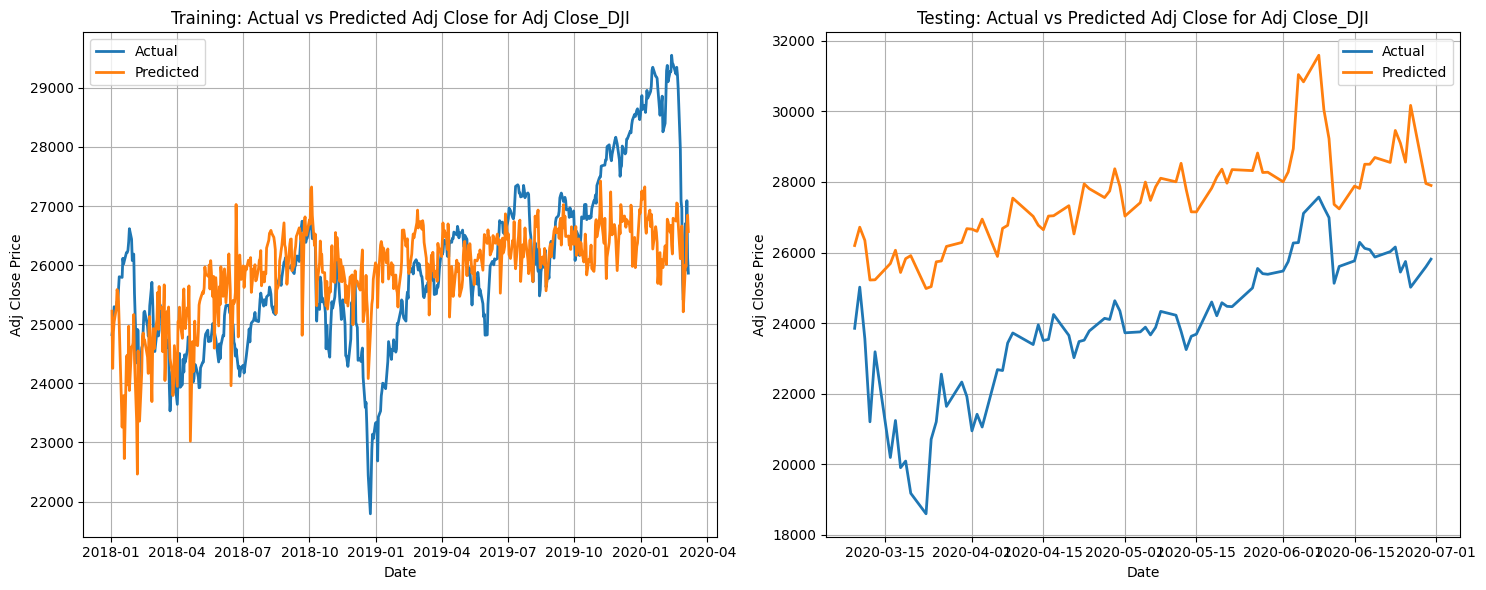

Metrics for Adj Close_GSPC:
Training RMSE: 157.8434
Testing RMSE: 295.9212
Training MAE: 120.4969
Testing MAE: 270.3426
Training MSE: 24914.5470
Testing MSE: 87569.3530
Training R²: 0.3067
Testing R²: -0.6133



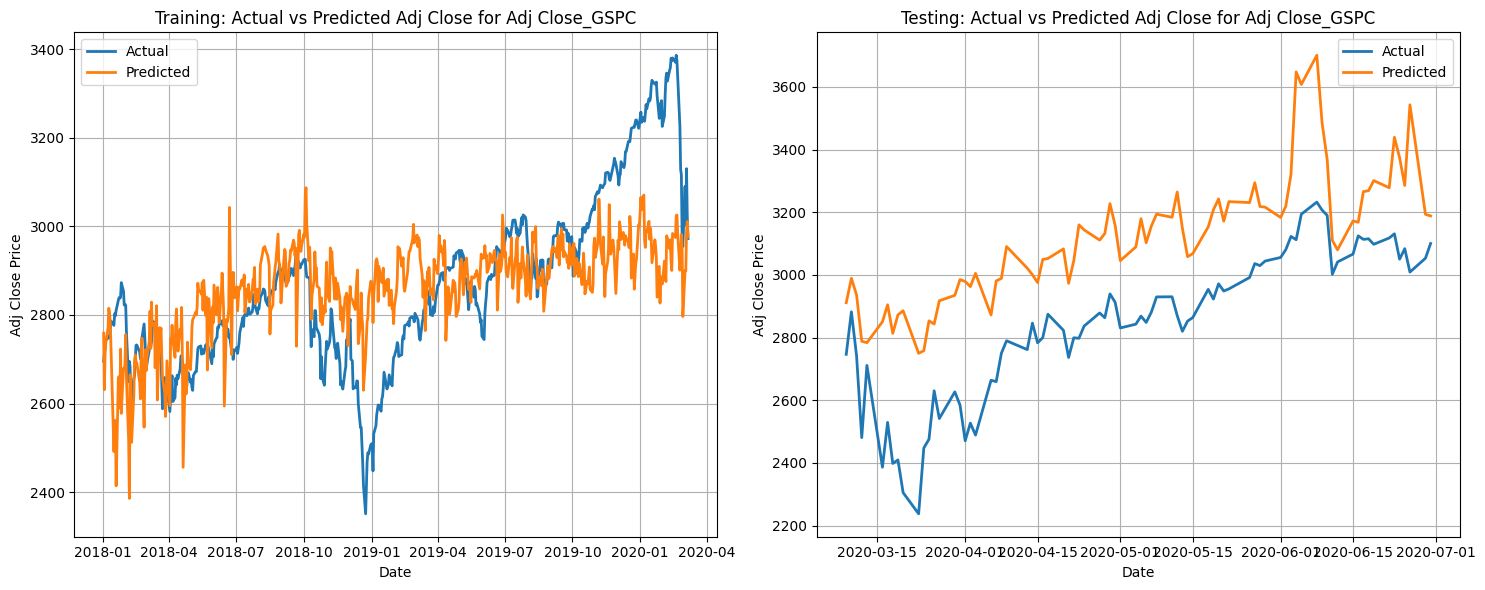

Metrics for Adj Close_IXIC:
Training RMSE: 529.8834
Testing RMSE: 485.9384
Training MAE: 393.5397
Testing MAE: 363.7522
Training MSE: 280776.4502
Testing MSE: 236136.0916
Training R²: 0.3335
Testing R²: 0.7309



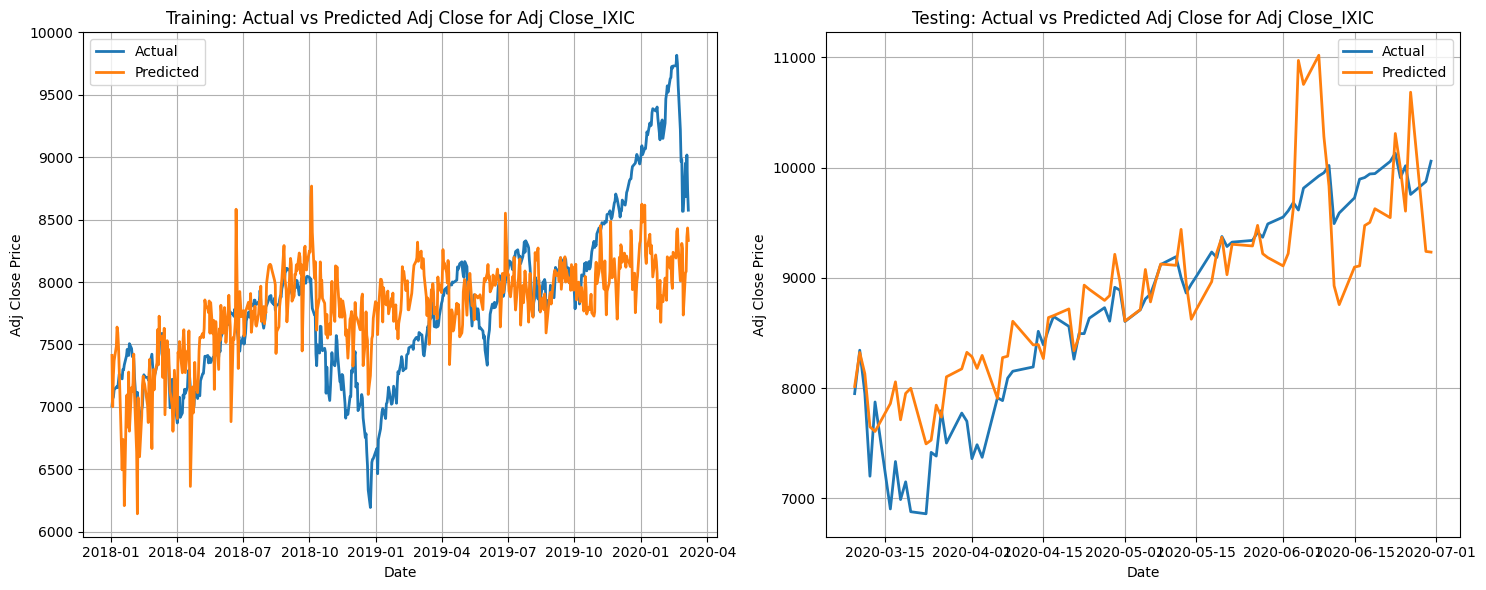

Metrics for Adj Close_RUT:
Training RMSE: 72.8671
Testing RMSE: 310.1436
Training MAE: 58.3406
Testing MAE: 295.7698
Training MSE: 5309.6098
Testing MSE: 96189.0281
Training R²: 0.1970
Testing R²: -4.3843



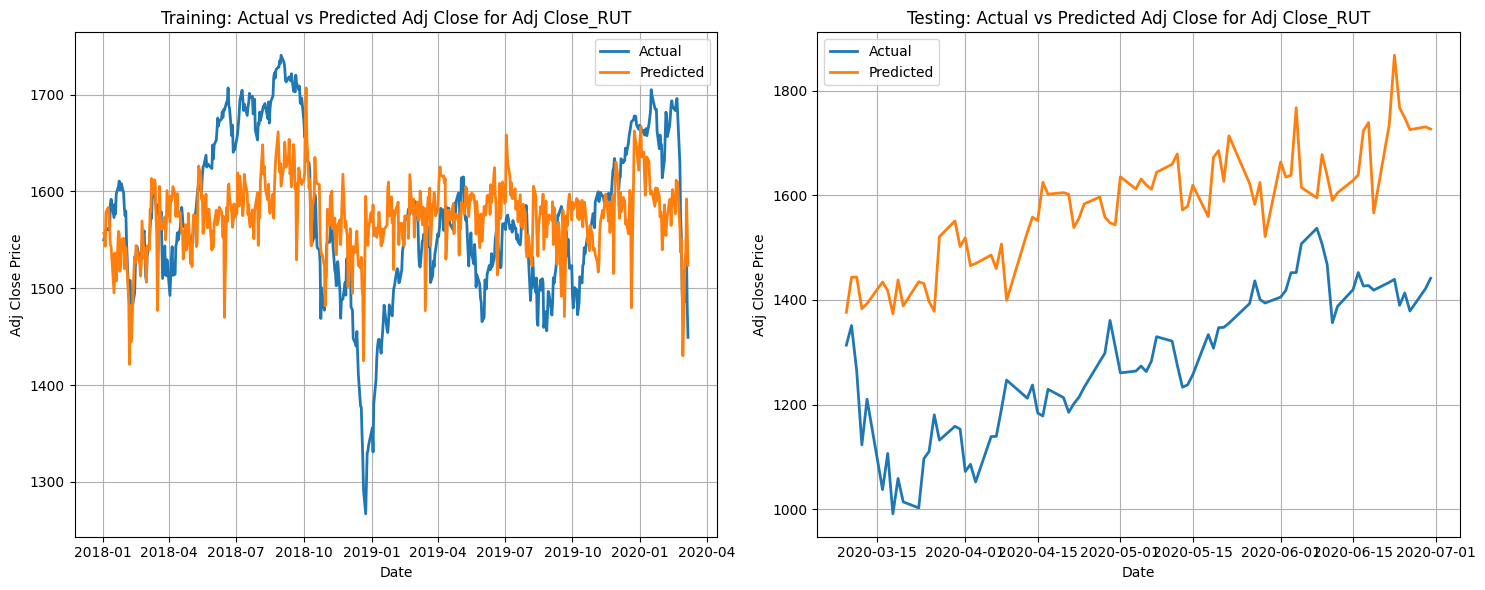

Aggregated Metrics for Training Data:
Adj Close_DJI
{'RMSE': 1162.0210105388849, 'MAE': 897.7067439629723, 'MSE': 1350292.8289338113, 'R²': 0.2959846026519779}

Adj Close_GSPC
{'RMSE': 157.8434254451711, 'MAE': 120.49688893391856, 'MSE': 24914.54695626529, 'R²': 0.30673325521250927}

Adj Close_IXIC
{'RMSE': 529.8834307579641, 'MAE': 393.5397485656179, 'MSE': 280776.45019183017, 'R²': 0.333493053290987}

Adj Close_RUT
{'RMSE': 72.86706933419381, 'MAE': 58.340571403853104, 'MSE': 5309.60979335421, 'R²': 0.1969593322419646}

Aggregated Metrics for Testing Data:
Adj Close_DJI
{'RMSE': 3778.0556004574955, 'MAE': 3619.2608078730977, 'MSE': 14273704.120148247, 'R²': -2.8824247114957005}

Adj Close_GSPC
{'RMSE': 295.92119387774653, 'MAE': 270.3426056417999, 'MSE': 87569.35298603086, 'R²': -0.6132578525408321}

Adj Close_IXIC
{'RMSE': 485.93836196568515, 'MAE': 363.7522443065362, 'MSE': 236136.09162989323, 'R²': 0.7308672806010219}

Adj Close_RUT
{'RMSE': 310.1435605474188, 'MAE': 295.769796504

In [ ]:
# Simple linear regression using volume as IV and adjusted closing price as DV

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Flatten the multi-index columns
df_flat = df_subset.copy()
df_flat.columns = ['_'.join(col).strip() for col in df_flat.columns.values]

df_flat.index = pd.to_datetime(df_flat.index)

# Split the data (training 1/2/2018 until day before crash)
train = df_flat.loc[:'2020-03-08']
test = df_flat.loc['2020-03-09':'2020-06-30']

metrics_train = {}
metrics_test = {}

for column in train.columns:
    if 'Adj Close' in column:

        X_train = train[[col for col in df_flat.columns if 'Volume' in col]]
        y_train = train[column]

        X_test = test[[col for col in df_flat.columns if 'Volume' in col]]
        y_test = test[column]

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        model = LinearRegression()

        model.fit(X_train_scaled, y_train)

        y_pred_train = model.predict(X_train_scaled)
        y_pred_test = model.predict(X_test_scaled)

        train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
        test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
        train_mae = mean_absolute_error(y_train, y_pred_train)
        test_mae = mean_absolute_error(y_test, y_pred_test)
        train_mse = mean_squared_error(y_train, y_pred_train)
        test_mse = mean_squared_error(y_test, y_pred_test)
        train_r2 = r2_score(y_train, y_pred_train)
        test_r2 = r2_score(y_test, y_pred_test)

        metrics_train[column] = {'RMSE': train_rmse, 'MAE': train_mae, 'MSE': train_mse, 'R²': train_r2}
        metrics_test[column] = {'RMSE': test_rmse, 'MAE': test_mae, 'MSE': test_mse, 'R²': test_r2}

        print(f'Metrics for {column}:')
        print(f'Training RMSE: {train_rmse:.4f}')
        print(f'Testing RMSE: {test_rmse:.4f}')
        print(f'Training MAE: {train_mae:.4f}')
        print(f'Testing MAE: {test_mae:.4f}')
        print(f'Training MSE: {train_mse:.4f}')
        print(f'Testing MSE: {test_mse:.4f}')
        print(f'Training R²: {train_r2:.4f}')
        print(f'Testing R²: {test_r2:.4f}')
        print()

        plt.figure(figsize=(15, 6))

        plt.subplot(1, 2, 1)
        plt.plot(train.index, y_train, label='Actual', linewidth=2)
        plt.plot(train.index, y_pred_train, label='Predicted', linewidth=2)
        plt.title(f'Training: Actual vs Predicted Adj Close for {column}')
        plt.xlabel('Date')
        plt.ylabel('Adj Close Price')
        plt.legend()
        plt.grid(True)

        plt.subplot(1, 2, 2)
        plt.plot(test.index, y_test, label='Actual', linewidth=2)
        plt.plot(test.index, y_pred_test, label='Predicted', linewidth=2)
        plt.title(f'Testing: Actual vs Predicted Adj Close for {column}')
        plt.xlabel('Date')
        plt.ylabel('Adj Close Price')
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.show()

print("Aggregated Metrics for Training Data:")
for index, metrics in metrics_train.items():
    print(index)
    print(metrics)
    print()

print("Aggregated Metrics for Testing Data:")
for index, metrics in metrics_test.items():
    print(index)
    print(metrics)
    print()


In [ ]:
# Combined metrics from above

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

df_flat = df_subset.copy()
df_flat.columns = ['_'.join(col).strip() for col in df_flat.columns.values]

df_flat.index = pd.to_datetime(df_flat.index)

train = df_flat.loc[:'2020-03-08']
test = df_flat.loc['2020-03-09':'2020-06-30']

X_train = train[[col for col in df_flat.columns if 'Volume' in col]]
y_train = train[[col for col in df_flat.columns if 'Adj Close' in col]]

X_test = test[[col for col in df_flat.columns if 'Volume' in col]]
y_test = test[[col for col in df_flat.columns if 'Adj Close' in col]]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()

model.fit(X_train_scaled, y_train)

y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)

from sklearn.metrics import mean_absolute_error, r2_score

train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f'Training RMSE: {train_rmse:.4f}')
print(f'Testing RMSE: {test_rmse:.4f}')
print(f'Training MAE: {train_mae:.4f}')
print(f'Testing MAE: {test_mae:.4f}')
print(f'Training MSE: {train_mse:.4f}')
print(f'Testing MSE: {test_mse:.4f}')
print(f'Training R²: {train_r2:.4f}')
print(f'Testing R²: {test_r2:.4f}')


Training RMSE: 644.4559
Testing RMSE: 1217.5147
Training MAE: 367.5210
Testing MAE: 1137.2814
Training MSE: 415323.3590
Testing MSE: 3673399.6482
Training R²: 0.2833
Testing R²: -1.7873


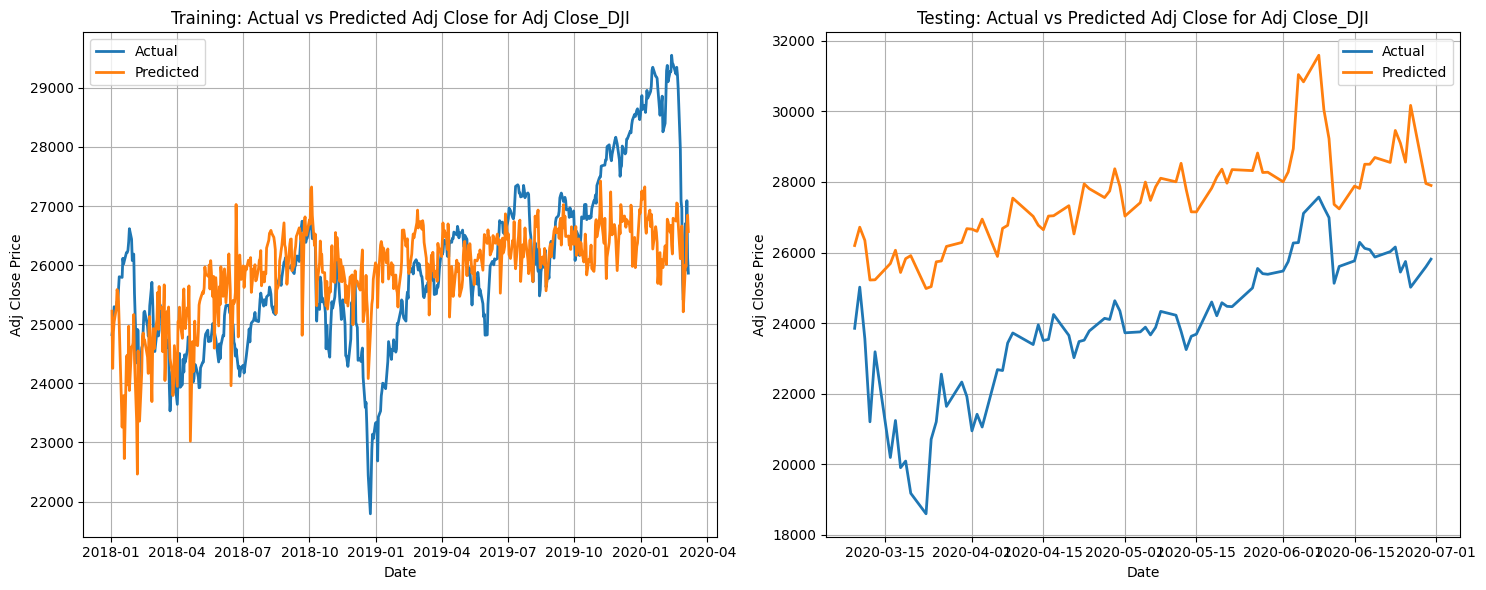

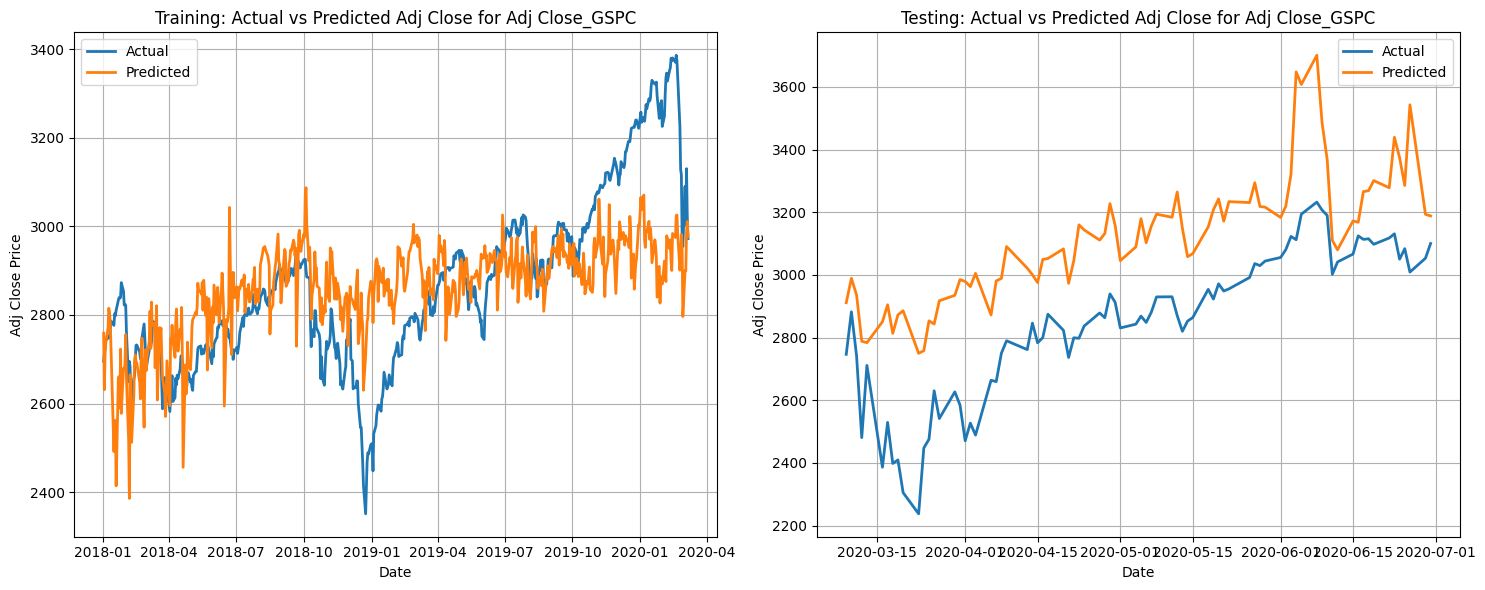

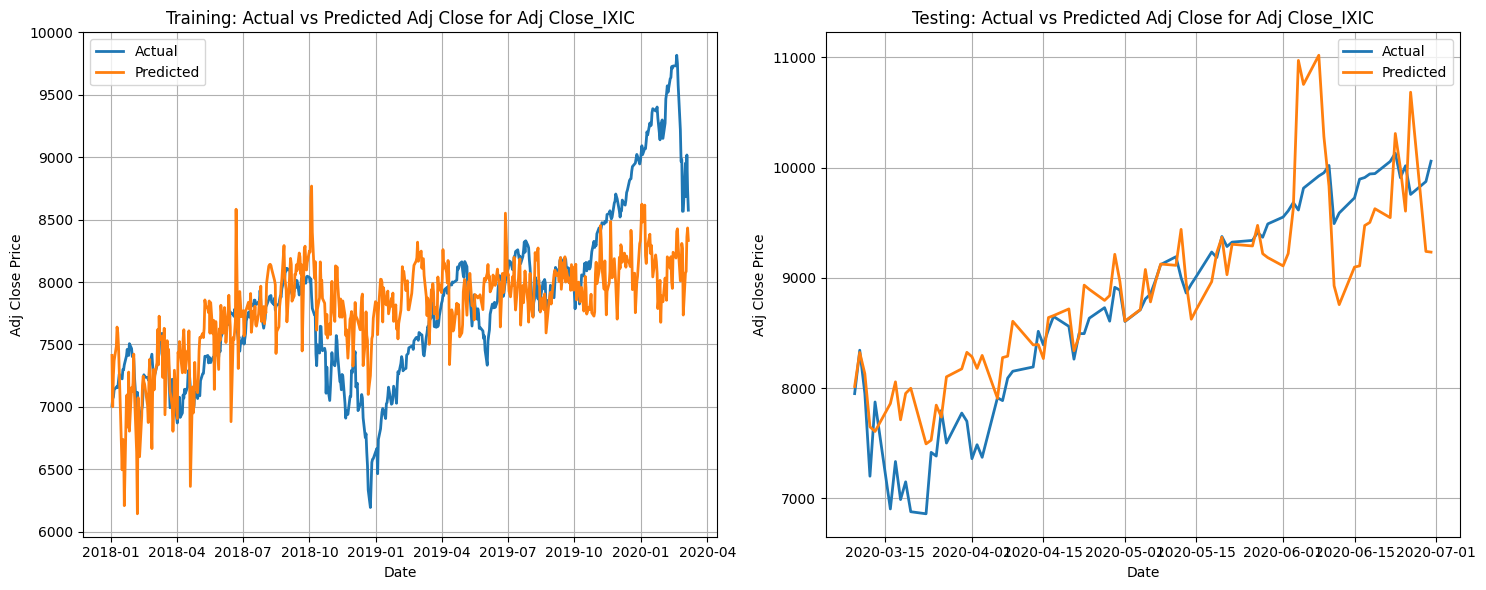

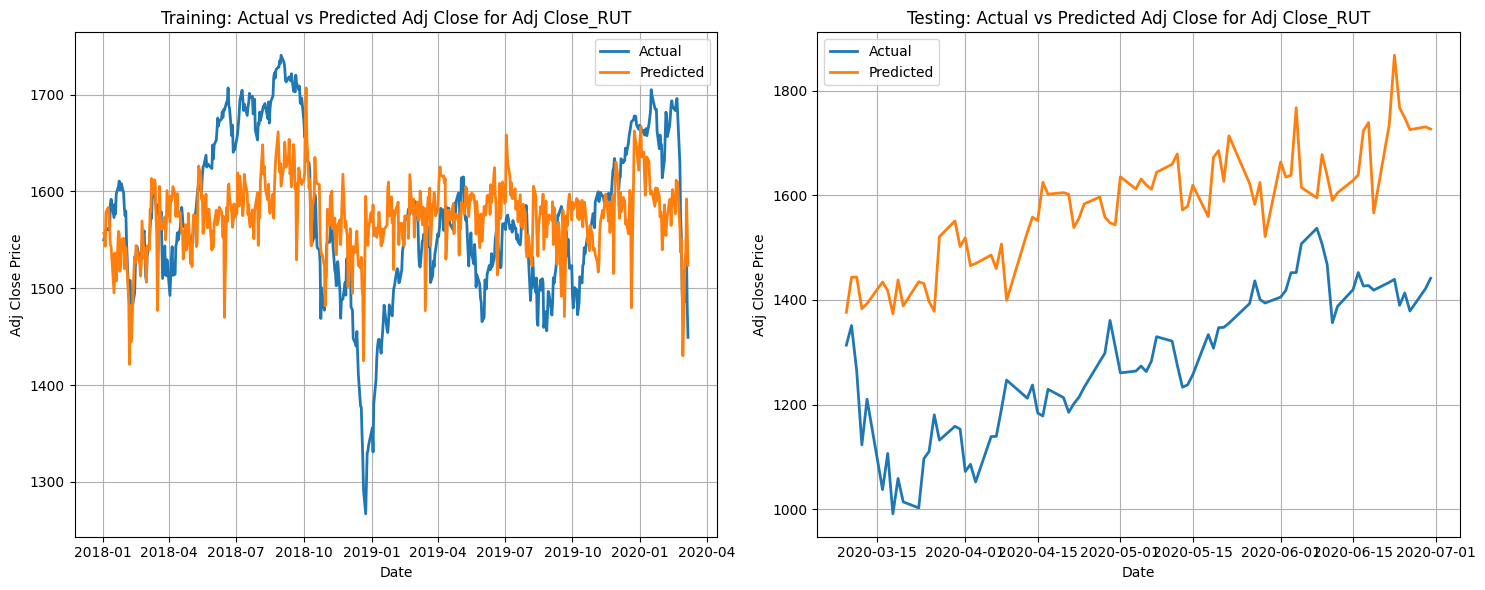

In [ ]:
# Plot training and testing resutls for each index

y_pred_train_df = pd.DataFrame(y_pred_train, index=train.index, columns=y_train.columns)
y_pred_test_df = pd.DataFrame(y_pred_test, index=test.index, columns=y_test.columns)

# Disable LaTeX
plt.rcParams['text.usetex'] = False

for column in y_train.columns:
    plt.figure(figsize=(15, 6))

    plt.subplot(1, 2, 1)
    plt.plot(train.index, y_train[column], label='Actual', linewidth=2)
    plt.plot(train.index, y_pred_train_df[column], label='Predicted', linewidth=2)
    plt.title(f'Training: Actual vs Predicted Adj Close for {column}')
    plt.xlabel('Date')
    plt.ylabel('Adj Close Price')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(test.index, y_test[column], label='Actual', linewidth=2)
    plt.plot(test.index, y_pred_test_df[column], label='Predicted', linewidth=2)
    plt.title(f'Testing: Actual vs Predicted Adj Close for {column}')
    plt.xlabel('Date')
    plt.ylabel('Adj Close Price')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

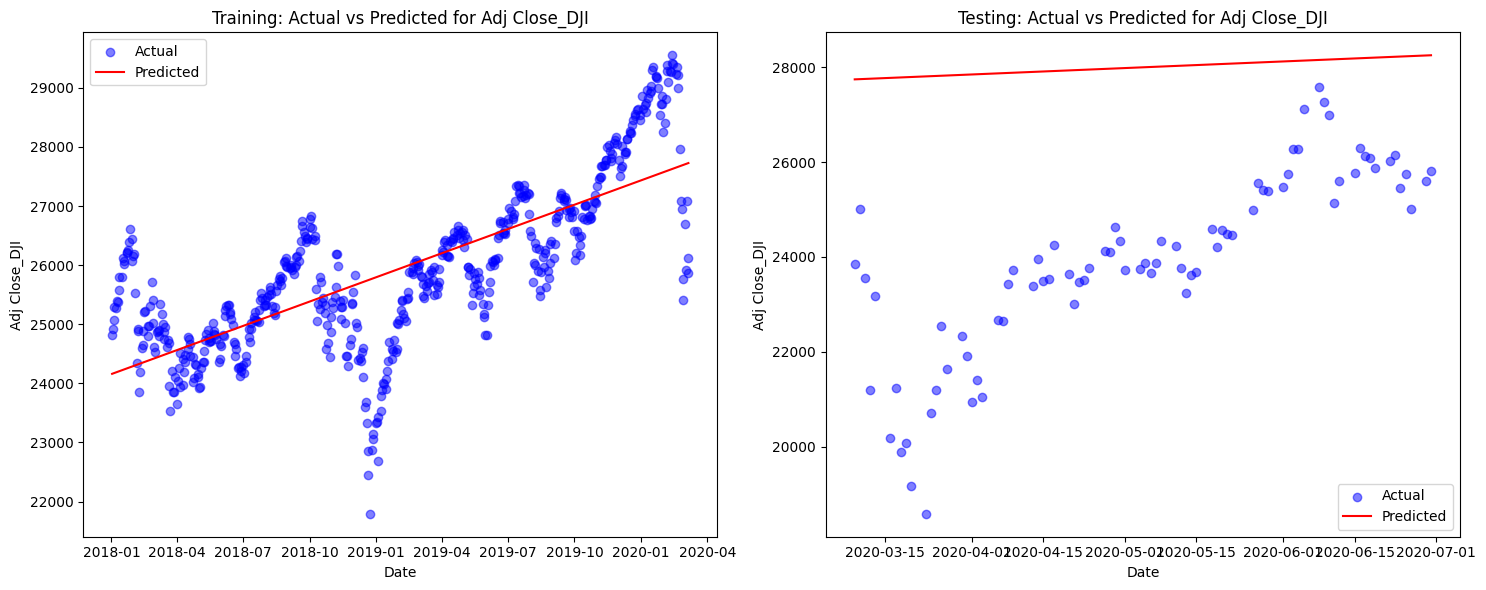

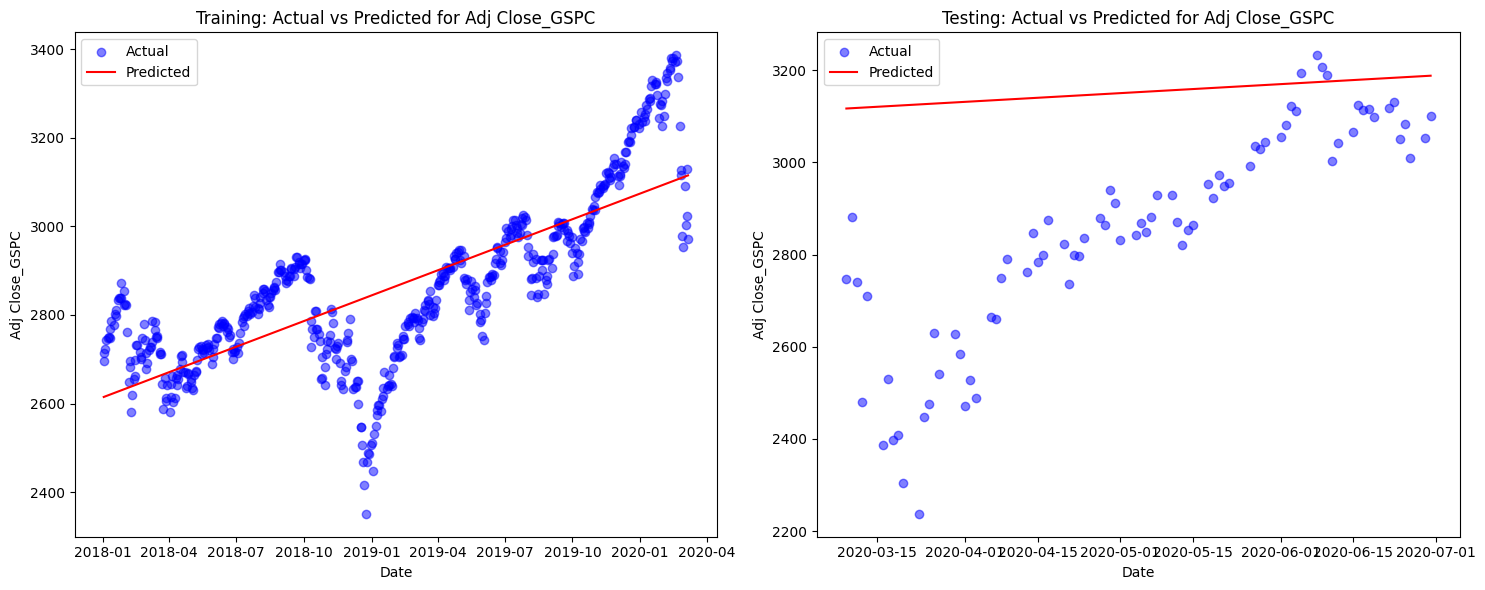

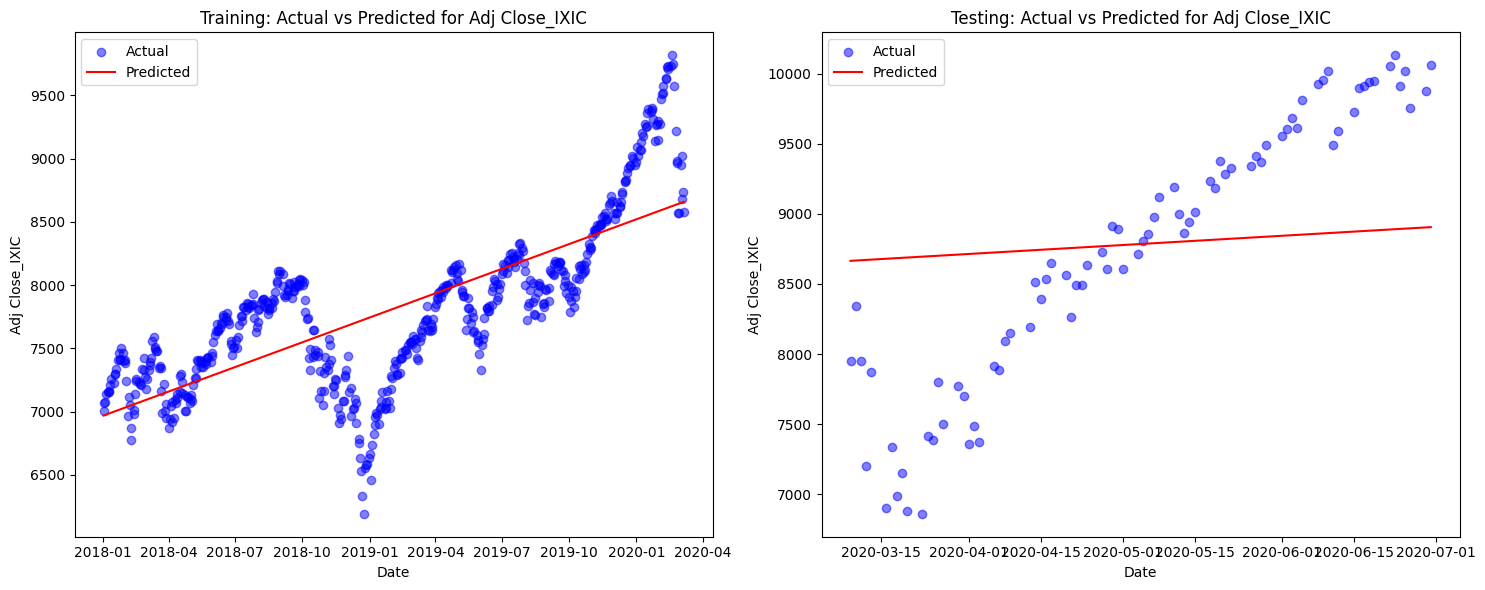

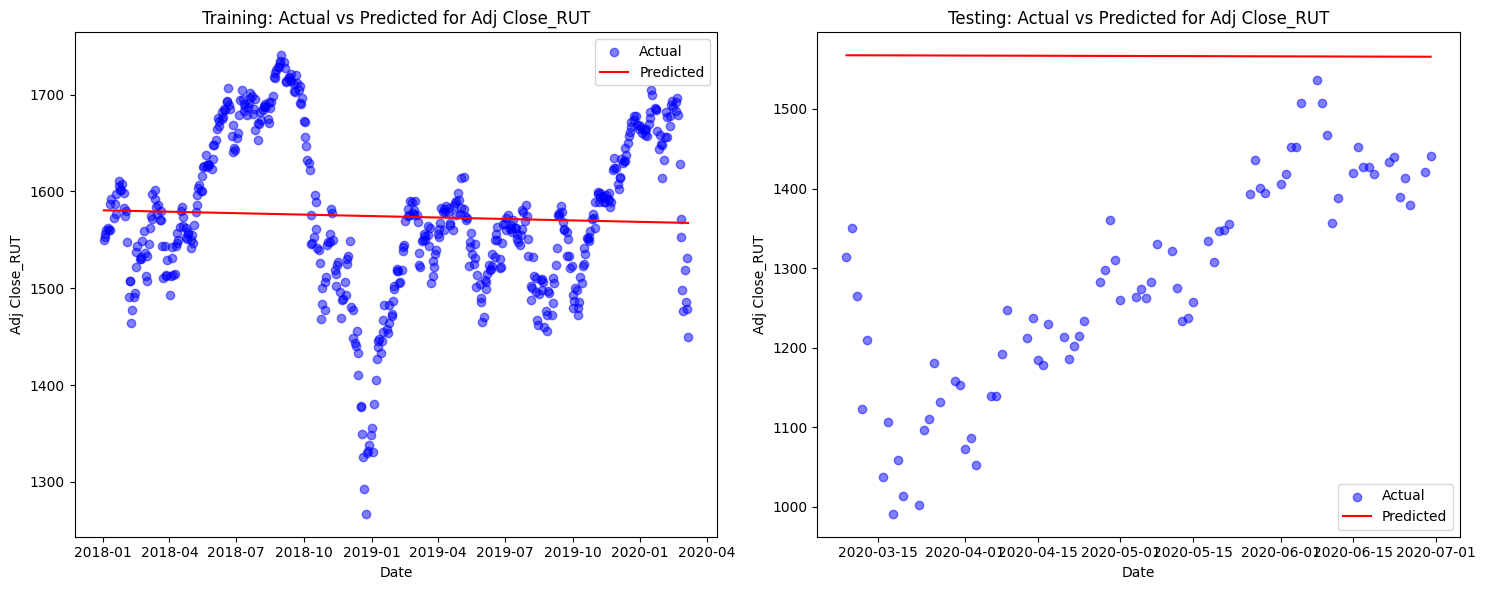

Adj Close_DJI - Training RMSE: 923.64, Testing RMSE: 4442.36
Adj Close_DJI - Training MAE: 694.37, Testing MAE: 4063.63
Adj Close_DJI - Training R2: 0.56, Testing R2: -4.37
Adj Close_GSPC - Training RMSE: 122.47, Testing RMSE: 372.37
Adj Close_GSPC - Training MAE: 94.43, Testing MAE: 307.39
Adj Close_GSPC - Training R2: 0.58, Testing R2: -1.55
Adj Close_IXIC - Training RMSE: 427.18, Testing RMSE: 870.28
Adj Close_IXIC - Training MAE: 337.42, Testing MAE: 730.02
Adj Close_IXIC - Training R2: 0.57, Testing R2: 0.14
Adj Close_RUT - Training RMSE: 81.23, Testing RMSE: 316.01
Adj Close_RUT - Training MAE: 63.65, Testing MAE: 286.14
Adj Close_RUT - Training R2: 0.00, Testing R2: -4.59


In [ ]:
# Simple linear regression with time as IV and adjusted closing price as DV

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from matplotlib.dates import date2num

df_flat = df_flat.sort_index()

df_flat['Time'] = (df_flat.index - df_flat.index.min()).days

train = df_flat.loc[:'2020-03-08']
test = df_flat.loc['2020-03-09':'2020-06-30']

model = LinearRegression()

metrics = {}

for column in [col for col in df_flat.columns if 'Adj Close' in col]:

    model.fit(train[['Time']], train[column])

    train_predictions = model.predict(train[['Time']])
    test_predictions = model.predict(test[['Time']])

    train_rmse = np.sqrt(mean_squared_error(train[column], train_predictions))
    test_rmse = np.sqrt(mean_squared_error(test[column], test_predictions))
    train_mae = mean_absolute_error(train[column], train_predictions)
    test_mae = mean_absolute_error(test[column], test_predictions)
    train_r2 = r2_score(train[column], train_predictions)
    test_r2 = r2_score(test[column], test_predictions)

    metrics[column] = (train_rmse, test_rmse, train_mae, test_mae, train_r2, test_r2)

    plt.figure(figsize=(15, 6))

    plt.subplot(1, 2, 1)
    plt.scatter(train.index, train[column], color='blue', label='Actual', alpha=0.5)
    plt.plot(train.index, train_predictions, color='red', label='Predicted')
    plt.title(f'Training: Actual vs Predicted for {column}')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.scatter(test.index, test[column], color='blue', label='Actual', alpha=0.5)
    plt.plot(test.index, test_predictions, color='red', label='Predicted')
    plt.title(f'Testing: Actual vs Predicted for {column}')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.legend()

    plt.tight_layout()
    plt.show()

for index, (train_rmse, test_rmse, train_mae, test_mae, train_r2, test_r2) in metrics.items():
    print(f"{index} - Training RMSE: {train_rmse:.2f}, Testing RMSE: {test_rmse:.2f}")
    print(f"{index} - Training MAE: {train_mae:.2f}, Testing MAE: {test_mae:.2f}")
    print(f"{index} - Training R2: {train_r2:.2f}, Testing R2: {test_r2:.2f}")


In [ ]:
# Calculate the number of data points in the training and testing sets
num_training_points = len(train)
num_testing_points = len(test)
total_points = num_training_points + num_testing_points

# Calculate the percentages
training_percentage = (num_training_points / total_points) * 100
testing_percentage = (num_testing_points / total_points) * 100

# Print out the percentages
print(f"Training data percentage: {training_percentage:.2f}%")
print(f"Testing data percentage: {testing_percentage:.2f}%")


Training data percentage: 87.26%
Testing data percentage: 12.74%


In [ ]:
df_flat_advanced


,Adj Close_DJI,Adj Close_GSPC,Adj Close_IXIC,Adj Close_RUT,Volume_DJI,Volume_GSPC,Volume_IXIC,Volume_RUT
Date,,,,,,,,
2018-01-02,24824.009766,2695.810059,7006.899902,1550.010010,341130000,3397430000,1929700000,3397430000
2018-01-03,24922.679688,2713.060059,7065.529785,1552.579956,456790000,3544030000,2173130000,3544030000
2018-01-04,25075.130859,2723.989990,7077.910156,1555.719971,403280000,3697340000,2103220000,3697340000
2018-01-05,25295.869141,2743.149902,7136.560059,1560.010010,358020000,3239280000,2024000000,3239280000
2018-01-08,25283.000000,2747.709961,7157.390137,1561.810059,341390000,3246160000,2055010000,3246160000
...,...,...,...,...,...,...,...,...
2023-12-22,37385.968750,4754.629883,14992.969727,2033.959961,252970000,3046770000,4796600000,3046770000
2023-12-26,37545.328125,4774.750000,15074.570312,2059.189941,212420000,2513910000,6120600000,2513910000
2023-12-27,37656.519531,4781.580078,15099.179688,2066.209961,245530000,2748450000,7480170000,2748450000


Adj Close_DJI - Training RMSE: 1279.09, Testing RMSE: 1889.86
Adj Close_DJI - Training MAE: 994.73, Testing MAE: 1543.90
Adj Close_DJI - Training R²: 0.15, Testing R²: 0.03


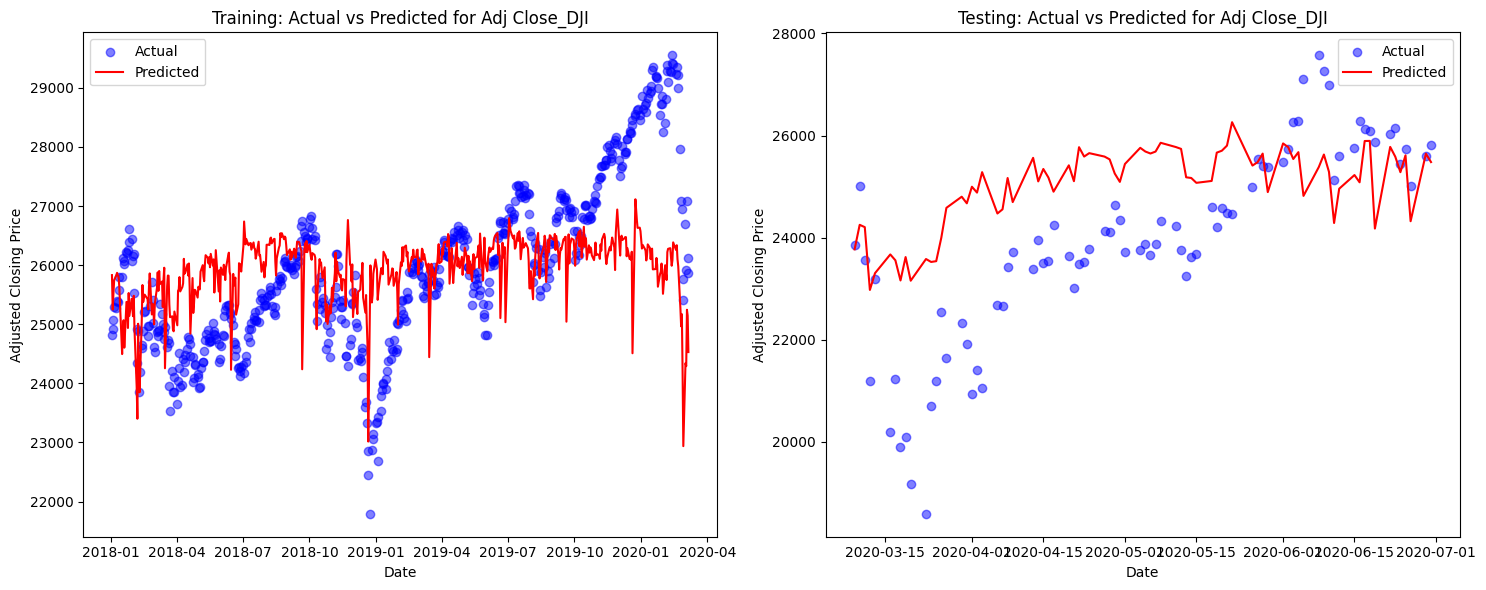

Adj Close_GSPC - Training RMSE: 188.96, Testing RMSE: 225.71
Adj Close_GSPC - Training MAE: 146.72, Testing MAE: 181.58
Adj Close_GSPC - Training R²: 0.01, Testing R²: 0.06


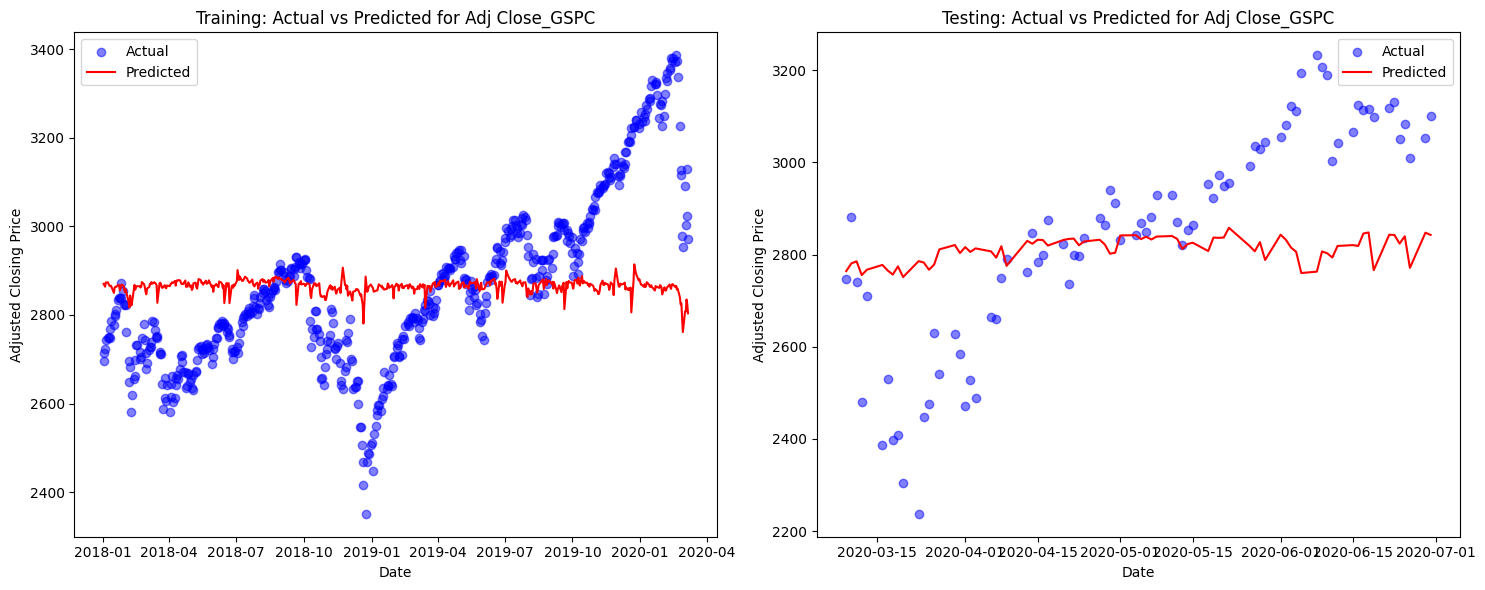

Adj Close_IXIC - Training RMSE: 647.87, Testing RMSE: 1179.05
Adj Close_IXIC - Training MAE: 497.83, Testing MAE: 1025.57
Adj Close_IXIC - Training R²: 0.00, Testing R²: -0.58


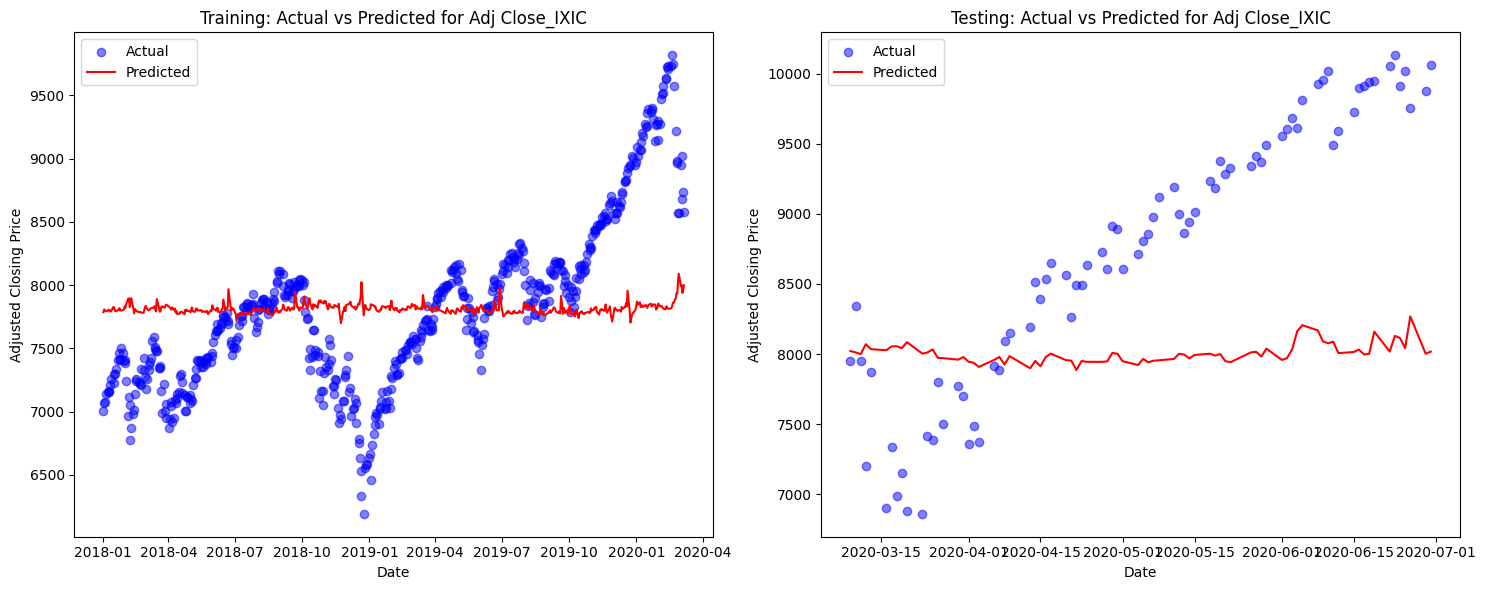

Adj Close_RUT - Training RMSE: 76.95, Testing RMSE: 237.27
Adj Close_RUT - Training MAE: 61.26, Testing MAE: 208.15
Adj Close_RUT - Training R²: 0.10, Testing R²: -2.15


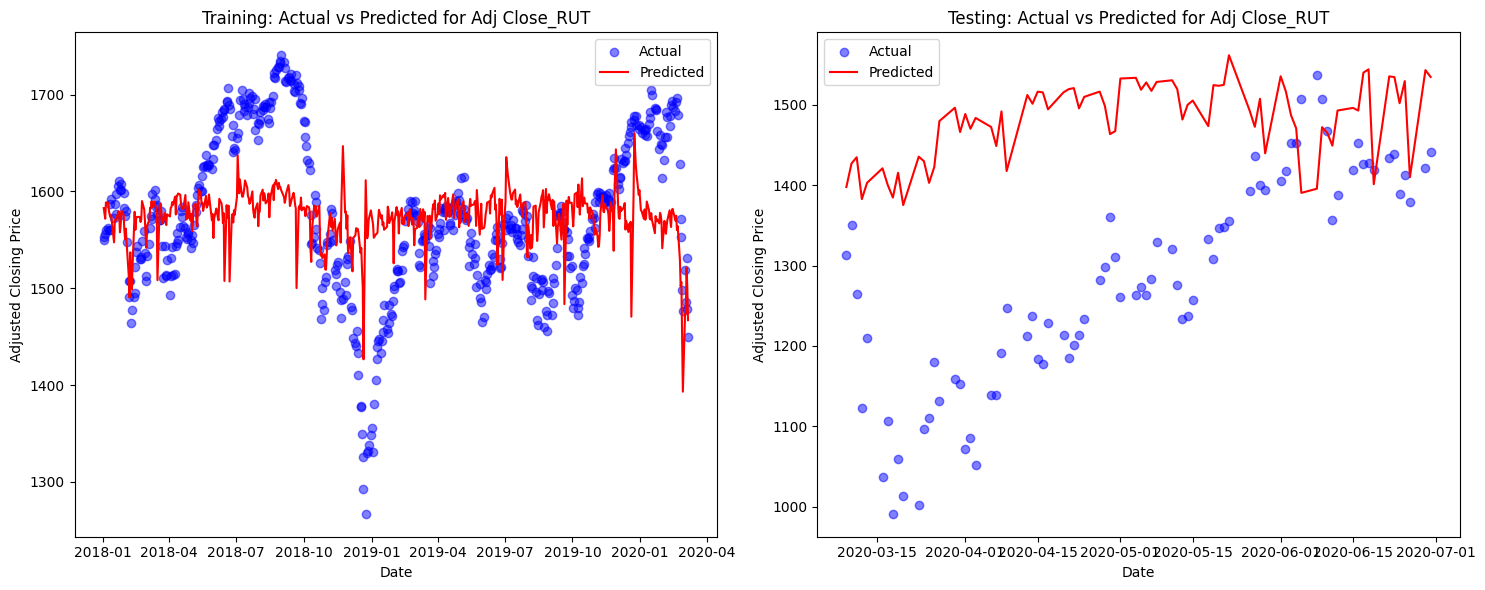

In [ ]:
# SGD regression with volume as IV and adjusted closing price as DV

import numpy as np
import pandas as pd
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

train = df_flat_advanced.loc[:'2020-03-08']
test = df_flat_advanced.loc['2020-03-09':'2020-06-30']

# pipeline with standard scaling and SGD regression
model = make_pipeline(StandardScaler(), SGDRegressor(
    max_iter=3000,  # maximum number of iterations
    tol=1e-3,       # tolerance for optimization
    alpha=0.000001,   # regularization strength
    penalty='l2',   # type of regularization
    learning_rate='invscaling',  # learning rate schedule
    shuffle=True    # shuffle the data
))

for column in [col for col in df_flat_advanced.columns if 'Adj Close' in col]:

    volume_column = column.replace('Adj Close', 'Volume')

    model.fit(train[[volume_column]], train[column])

    train_predictions = model.predict(train[[volume_column]])
    test_predictions = model.predict(test[[volume_column]])

    train_rmse = np.sqrt(mean_squared_error(train[column], train_predictions))
    test_rmse = np.sqrt(mean_squared_error(test[column], test_predictions))
    train_mae = mean_absolute_error(train[column], train_predictions)
    test_mae = mean_absolute_error(test[column], test_predictions)
    train_r2 = r2_score(train[column], train_predictions)
    test_r2 = r2_score(test[column], test_predictions)

    print(f"{column} - Training RMSE: {train_rmse:.2f}, Testing RMSE: {test_rmse:.2f}")
    print(f"{column} - Training MAE: {train_mae:.2f}, Testing MAE: {test_mae:.2f}")
    print(f"{column} - Training R²: {train_r2:.2f}, Testing R²: {test_r2:.2f}")

    plt.figure(figsize=(15, 6))

    plt.subplot(1, 2, 1)
    plt.scatter(train.index, train[column], color='blue', label='Actual', alpha=0.5)
    plt.plot(train.index, train_predictions, color='red', label='Predicted')
    plt.title(f'Training: Actual vs Predicted for {column}')
    plt.xlabel('Date')
    plt.ylabel('Adjusted Closing Price')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.scatter(test.index, test[column], color='blue', label='Actual', alpha=0.5)
    plt.plot(test.index, test_predictions, color='red', label='Predicted')
    plt.title(f'Testing: Actual vs Predicted for {column}')
    plt.xlabel('Date')
    plt.ylabel('Adjusted Closing Price')
    plt.legend()

    plt.tight_layout()
    plt.show()


Adj Close_DJI - Training RMSE: 1365.82, Testing RMSE: 2664.99
Adj Close_DJI - Training MAE: 1056.72, Testing MAE: 2063.86
Adj Close_DJI - Training R²: 0.03, Testing R²: -0.93


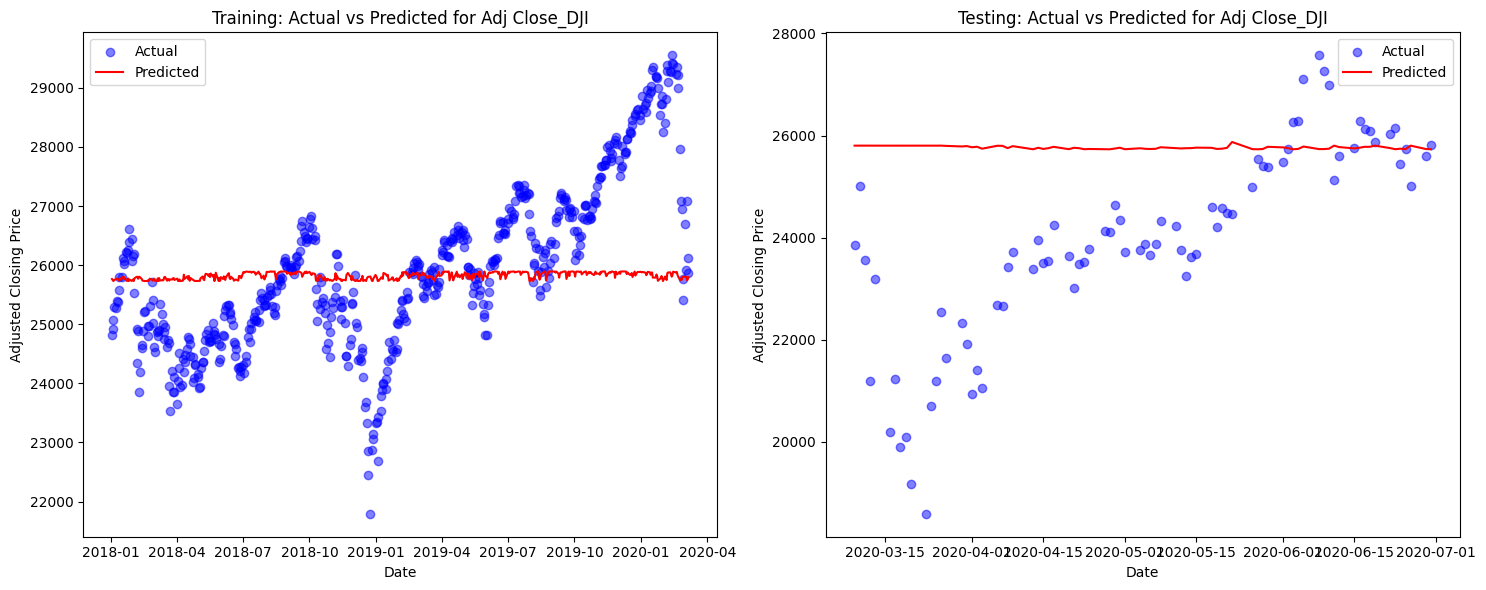

Adj Close_GSPC - Training RMSE: 191.05, Testing RMSE: 236.44
Adj Close_GSPC - Training MAE: 143.34, Testing MAE: 190.94
Adj Close_GSPC - Training R²: -0.02, Testing R²: -0.03


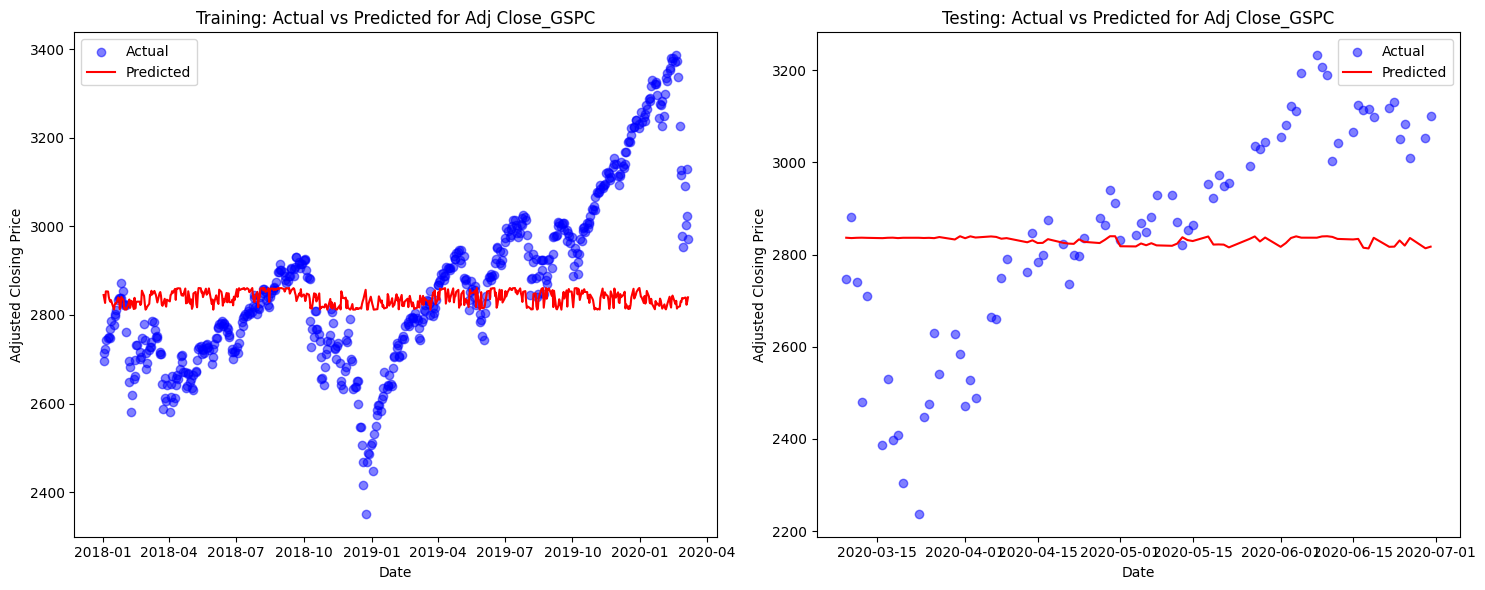

Adj Close_IXIC - Training RMSE: 650.25, Testing RMSE: 1345.13
Adj Close_IXIC - Training MAE: 489.64, Testing MAE: 1150.32
Adj Close_IXIC - Training R²: -0.00, Testing R²: -1.06


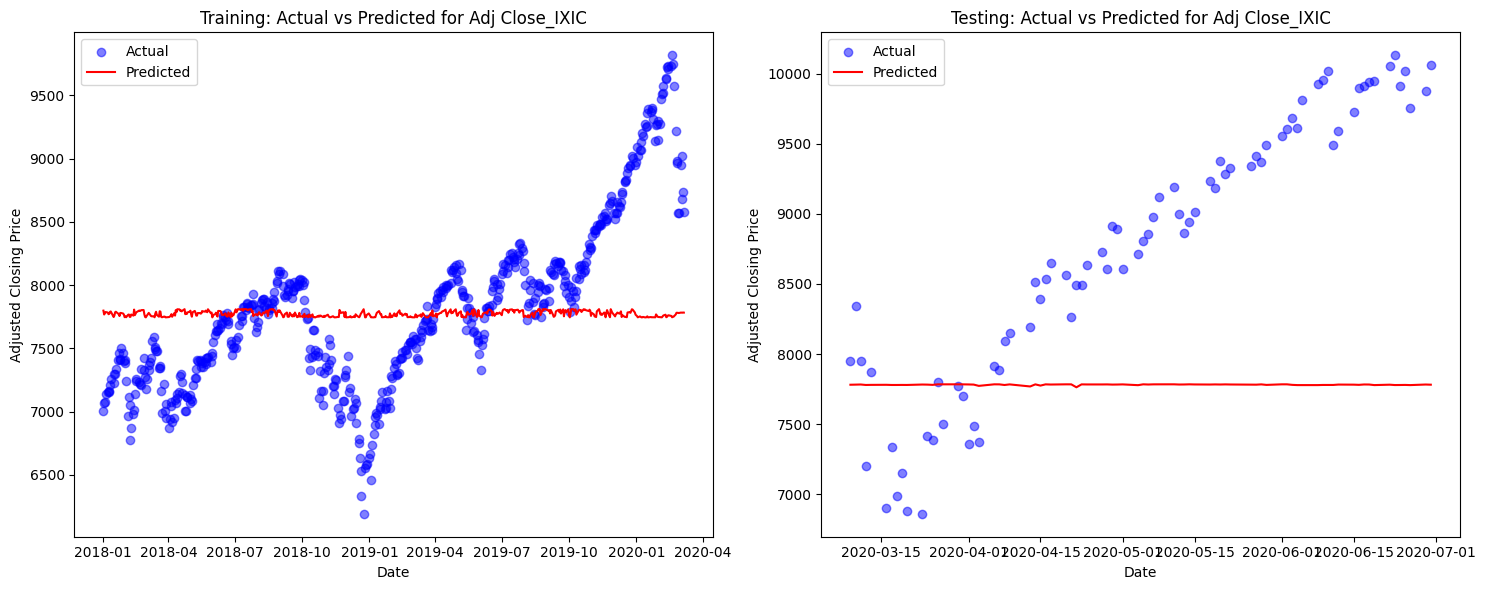

Adj Close_RUT - Training RMSE: 78.97, Testing RMSE: 304.99
Adj Close_RUT - Training MAE: 61.76, Testing MAE: 273.37
Adj Close_RUT - Training R²: 0.06, Testing R²: -4.21


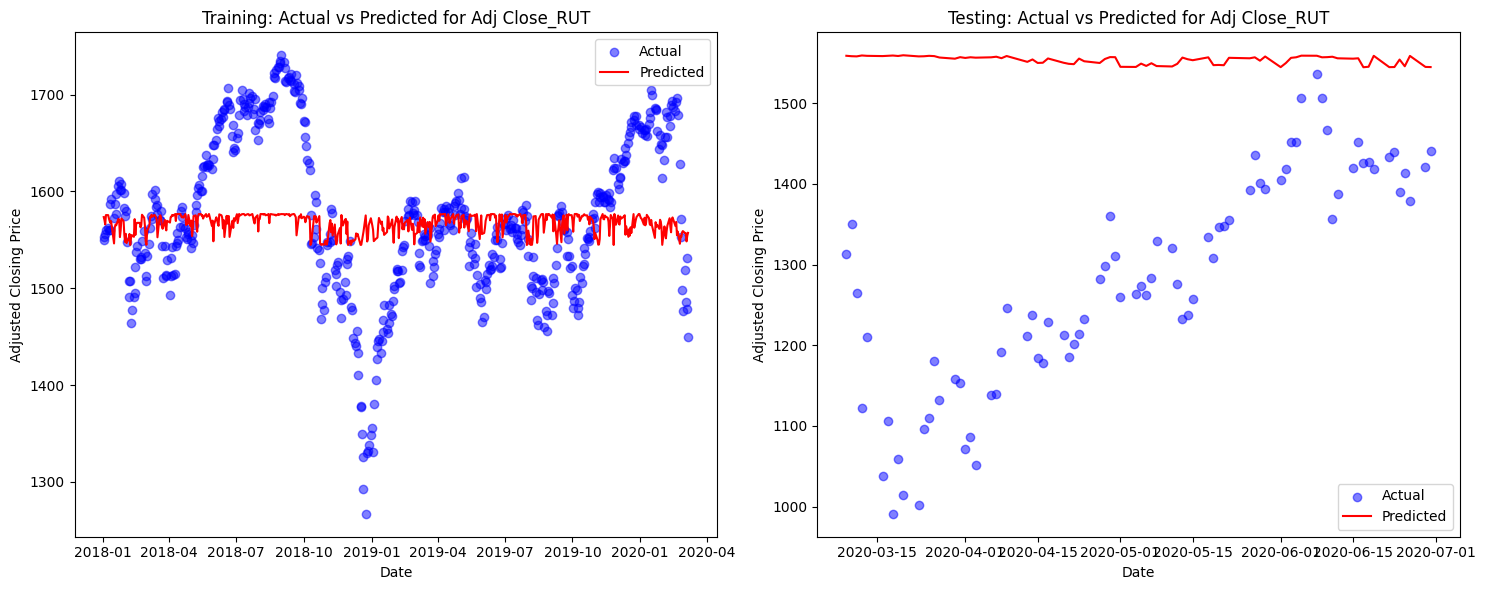

In [ ]:
# SGR with volume as IV and adjusted closing price as DV

import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

train = df_flat_advanced.loc[:'2020-03-08']
test = df_flat_advanced.loc['2020-03-09':'2020-06-30']

model = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=1.0, epsilon=0.1))

for column in [col for col in df_flat_advanced.columns if 'Adj Close' in col]:

    volume_column = column.replace('Adj Close', 'Volume')

    model.fit(train[[volume_column]], train[column])

    train_predictions = model.predict(train[[volume_column]])
    test_predictions = model.predict(test[[volume_column]])

    train_rmse = np.sqrt(mean_squared_error(train[column], train_predictions))
    test_rmse = np.sqrt(mean_squared_error(test[column], test_predictions))
    train_mae = mean_absolute_error(train[column], train_predictions)
    test_mae = mean_absolute_error(test[column], test_predictions)
    train_r2 = r2_score(train[column], train_predictions)
    test_r2 = r2_score(test[column], test_predictions)

    print(f"{column} - Training RMSE: {train_rmse:.2f}, Testing RMSE: {test_rmse:.2f}")
    print(f"{column} - Training MAE: {train_mae:.2f}, Testing MAE: {test_mae:.2f}")
    print(f"{column} - Training R²: {train_r2:.2f}, Testing R²: {test_r2:.2f}")

    plt.figure(figsize=(15, 6))

    plt.subplot(1, 2, 1)
    plt.scatter(train.index, train[column], color='blue', label='Actual', alpha=0.5)
    plt.plot(train.index, train_predictions, color='red', label='Predicted')
    plt.title(f'Training: Actual vs Predicted for {column}')
    plt.xlabel('Date')
    plt.ylabel('Adjusted Closing Price')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.scatter(test.index, test[column], color='blue', label='Actual', alpha=0.5)
    plt.plot(test.index, test_predictions, color='red', label='Predicted')
    plt.title(f'Testing: Actual vs Predicted for {column}')
    plt.xlabel('Date')
    plt.ylabel('Adjusted Closing Price')
    plt.legend()

    plt.tight_layout()
    plt.show()


In [ ]:
df_flat_advanced

,Adj Close_DJI,Adj Close_GSPC,Adj Close_IXIC,Adj Close_RUT,Volume_DJI,Volume_GSPC,Volume_IXIC,Volume_RUT
Date,,,,,,,,
2018-01-02,24824.009766,2695.810059,7006.899902,1550.010010,341130000,3397430000,1929700000,3397430000
2018-01-03,24922.679688,2713.060059,7065.529785,1552.579956,456790000,3544030000,2173130000,3544030000
2018-01-04,25075.130859,2723.989990,7077.910156,1555.719971,403280000,3697340000,2103220000,3697340000
2018-01-05,25295.869141,2743.149902,7136.560059,1560.010010,358020000,3239280000,2024000000,3239280000
2018-01-08,25283.000000,2747.709961,7157.390137,1561.810059,341390000,3246160000,2055010000,3246160000
...,...,...,...,...,...,...,...,...
2023-12-22,37385.968750,4754.629883,14992.969727,2033.959961,252970000,3046770000,4796600000,3046770000
2023-12-26,37545.328125,4774.750000,15074.570312,2059.189941,212420000,2513910000,6120600000,2513910000
2023-12-27,37656.519531,4781.580078,15099.179688,2066.209961,245530000,2748450000,7480170000,2748450000


In [ ]:
df_subset


Adj Close                                             Volume  \
                     DJI         GSPC          IXIC          RUT        DJI   
Date                                                                          
2018-01-02  24824.009766  2695.810059   7006.899902  1550.010010  341130000   
2018-01-03  24922.679688  2713.060059   7065.529785  1552.579956  456790000   
2018-01-04  25075.130859  2723.989990   7077.910156  1555.719971  403280000   
2018-01-05  25295.869141  2743.149902   7136.560059  1560.010010  358020000   
2018-01-08  25283.000000  2747.709961   7157.390137  1561.810059  341390000   
...                  ...          ...           ...          ...        ...   
2023-12-22  37385.968750  4754.629883  14992.969727  2033.959961  252970000   
2023-12-26  37545.328125  4774.750000  15074.570312  2059.189941  212420000   
2023-12-27  37656.519531  4781.580078  15099.179688  2066.209961  245530000   
2023-12-28  37710.101562  4783.350098  15095.139648  2058.340088  199550000   
2023-12-29  37689.539062  4769.830078  15011.349609  2027.069946  234570000   

                                                
                  GSPC        IXIC         RUT  
Date                                            
2018-01-02  3397430000  1929700000  3397430000  
2018-01-03  3544030000  2173130000  3544030000  
2018-01-04  3697340000  2103220000  3697340000  
2018-01-05  3239280000  2024000000  3239280000  
2018-01-08  3246160000  2055010000  3246160000  
...                ...         ...         ...  
2023-12-22  3046770000  4796600000  3046770000  
2023-12-26  2513910000  6120600000  2513910000  
2023-12-27  2748450000  7480170000  2748450000  
2023-12-28  2698860000  5090570000  2698860000  
2023-12-29  3126060000  5441060000  3126060000  

[1509 rows x 8 columns]

In [ ]:
# keep only adjusted closing prices
df_close = raw_data['Adj Close'].dropna(axis='rows')

# examine new dataset
df_close

Ticker,^DJI,^GSPC,^IXIC,^RUT
Date,,,,
2018-01-02,24824.009766,2695.810059,7006.899902,1550.010010
2018-01-03,24922.679688,2713.060059,7065.529785,1552.579956
2018-01-04,25075.130859,2723.989990,7077.910156,1555.719971
2018-01-05,25295.869141,2743.149902,7136.560059,1560.010010
2018-01-08,25283.000000,2747.709961,7157.390137,1561.810059
...,...,...,...,...
2023-12-22,37385.968750,4754.629883,14992.969727,2033.959961
2023-12-26,37545.328125,4774.750000,15074.570312,2059.189941
2023-12-27,37656.519531,4781.580078,15099.179688,2066.209961


In [ ]:
df_close_original = df_close.copy()

In [ ]:
df_close_original

Ticker,^DJI,^GSPC,^IXIC,^RUT
Date,,,,
2018-01-02,24824.009766,2695.810059,7006.899902,1550.010010
2018-01-03,24922.679688,2713.060059,7065.529785,1552.579956
2018-01-04,25075.130859,2723.989990,7077.910156,1555.719971
2018-01-05,25295.869141,2743.149902,7136.560059,1560.010010
2018-01-08,25283.000000,2747.709961,7157.390137,1561.810059
...,...,...,...,...
2023-12-22,37385.968750,4754.629883,14992.969727,2033.959961
2023-12-26,37545.328125,4774.750000,15074.570312,2059.189941
2023-12-27,37656.519531,4781.580078,15099.179688,2066.209961


In [ ]:
from numpy.linalg import pinv

df_close_original['Time'] = (df_close_original.index - df_close_original.index.min()).days

In [ ]:
df_close_original

Ticker,^DJI,^GSPC,^IXIC,^RUT,Time
Date,,,,,
2018-01-02,24824.009766,2695.810059,7006.899902,1550.010010,0
2018-01-03,24922.679688,2713.060059,7065.529785,1552.579956,1
2018-01-04,25075.130859,2723.989990,7077.910156,1555.719971,2
2018-01-05,25295.869141,2743.149902,7136.560059,1560.010010,3
2018-01-08,25283.000000,2747.709961,7157.390137,1561.810059,6
...,...,...,...,...,...
2023-12-22,37385.968750,4754.629883,14992.969727,2033.959961,2180
2023-12-26,37545.328125,4774.750000,15074.570312,2059.189941,2184
2023-12-27,37656.519531,4781.580078,15099.179688,2066.209961,2185


Metrics for ^DJI:
Training - MAE: 338.9800, MSE: 205951.1955, RMSE: 453.8185, R2: 0.8926
Testing - MAE: 2987.5201, MSE: 11008291.8011, RMSE: 3317.8746, R2: -1.9942




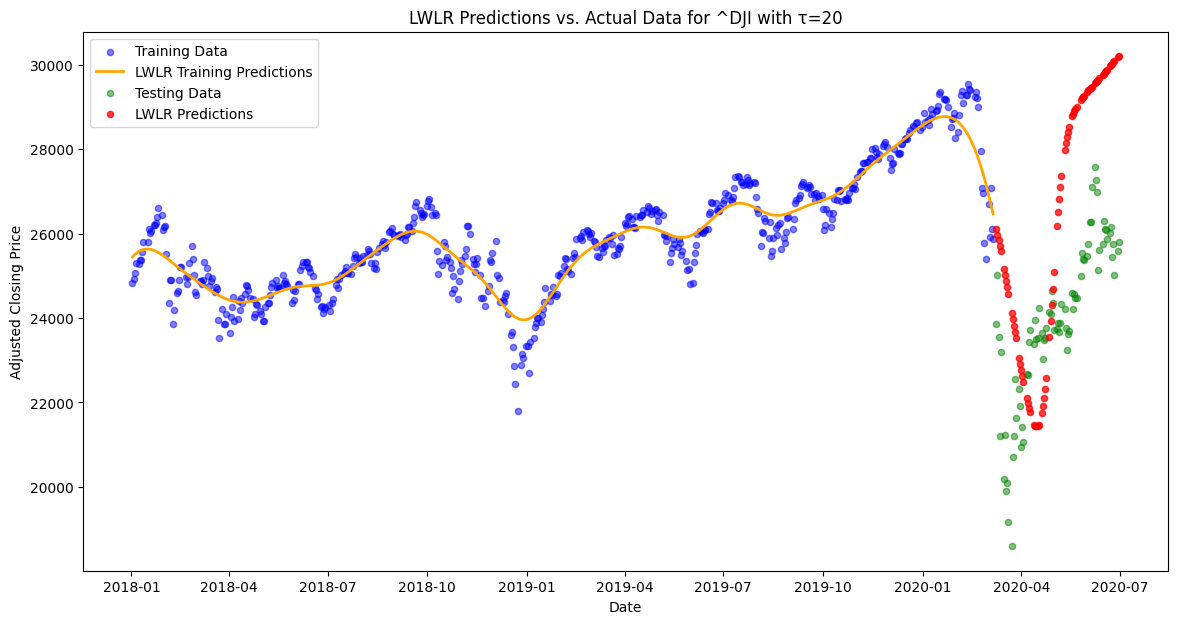

Metrics for ^GSPC:
Training - MAE: 35.2722, MSE: 2357.8302, RMSE: 48.5575, R2: 0.9344
Testing - MAE: 295.0008, MSE: 102217.4062, RMSE: 319.7146, R2: -0.8831




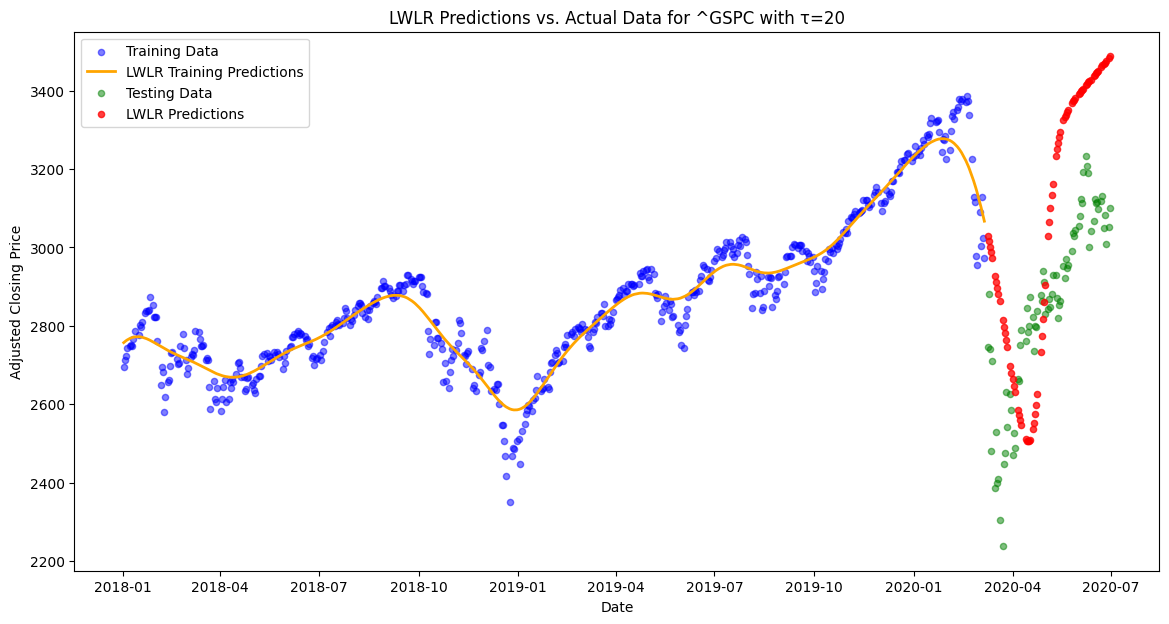

Metrics for ^IXIC:
Training - MAE: 116.2691, MSE: 23946.1939, RMSE: 154.7456, R2: 0.9432
Testing - MAE: 494.5144, MSE: 425736.7925, RMSE: 652.4851, R2: 0.5148




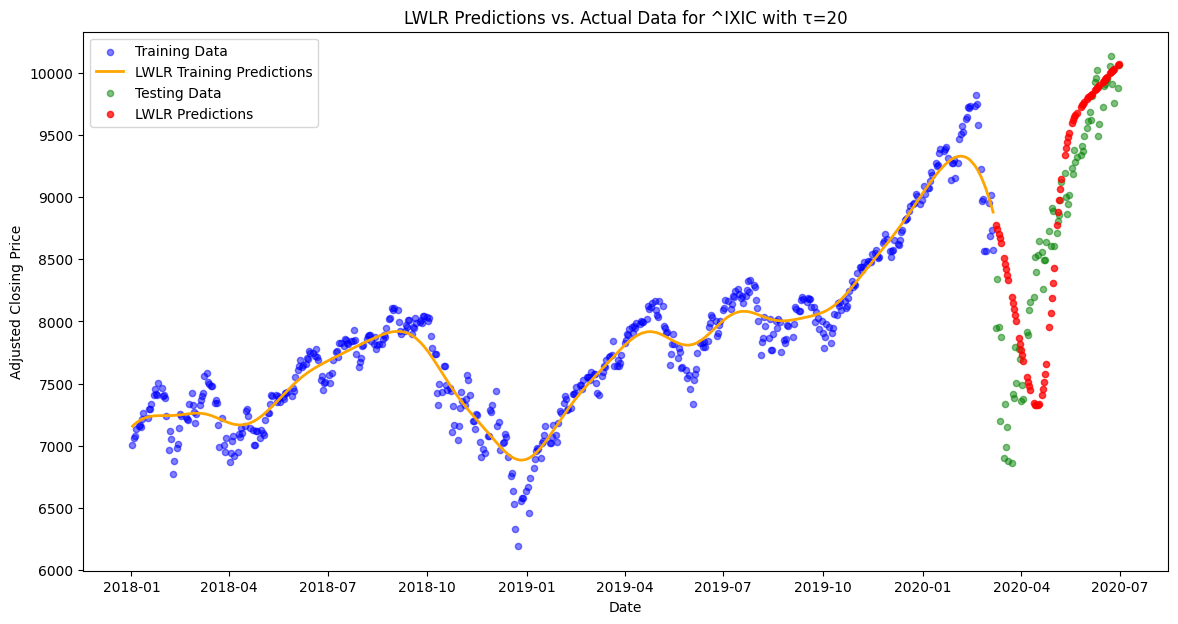

Metrics for ^RUT:
Training - MAE: 23.7071, MSE: 985.0860, RMSE: 31.3861, R2: 0.8510
Testing - MAE: 207.9069, MSE: 55688.8094, RMSE: 235.9848, R2: -2.1172




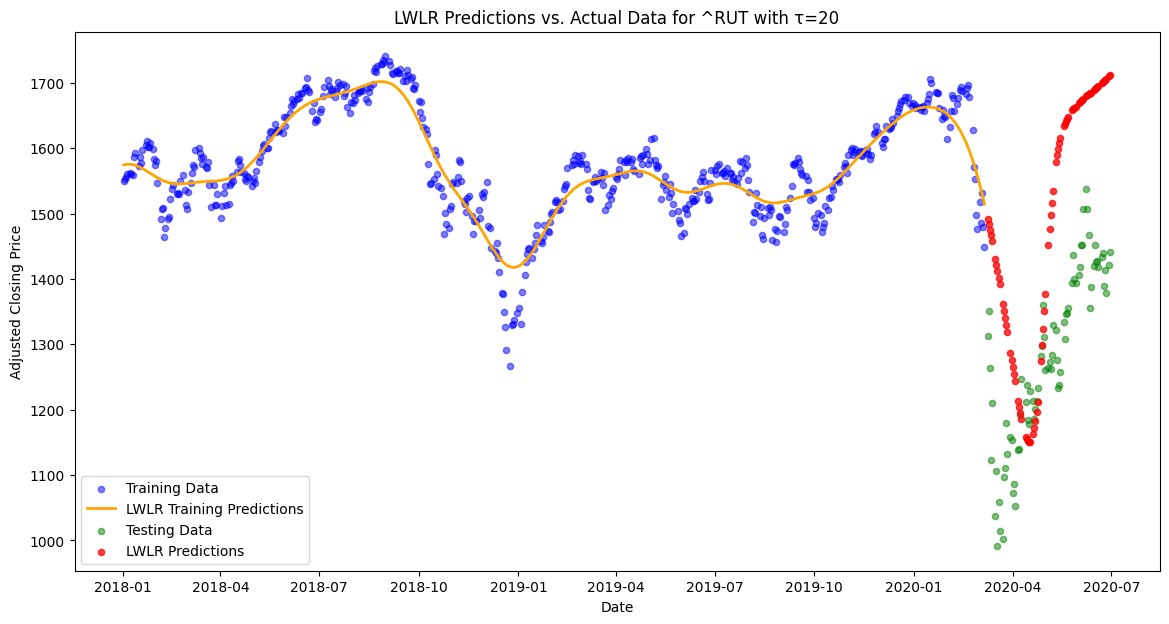

In [ ]:
# Locally-weighted linear regression with time as IV and adjusted closing price as DV

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import pinv

tau = 20

def lwlr(X, y, X_query, tau=1.0, regularization_constant=1e-5):
    """
    Performs Locally Weighted Linear Regression (LWLR) with regularization.

    :param X: Feature matrix for training data, shape (m, 1)
    :param y: Target vector for training data, shape (m,)
    :param X_query: Query points, shape (k, 1), where k is the number of query points
    :param tau: Bandwidth parameter
    :param regularization_constant: Constant added to the diagonal for regularization

    :return: Predictions for each query point, shape (k,)
    """
    m = X.shape[0]
    predictions = np.zeros(X_query.shape[0])

    X_with_intercept = np.hstack((np.ones((m, 1)), X))

    for i, x_query in enumerate(X_query):
        x_query_with_intercept = np.hstack((1, x_query))

        distances = np.sum((X - x_query)**2, axis=1)
        weights = np.exp(-distances / (2 * tau**2))
        W = np.diag(weights)

        A = X_with_intercept.T @ W @ X_with_intercept
        A_reg = A + regularization_constant * np.eye(A.shape[0])
        theta = pinv(A_reg) @ X_with_intercept.T @ W @ y

        predictions[i] = x_query_with_intercept @ theta

    return predictions

df_close_original['Time'] = (df_close_original.index - df_close_original.index.min()).days

train_start_date = pd.to_datetime('2018-01-02')
train_cutoff_date = pd.to_datetime('2020-03-08')
test_cutoff_date = pd.to_datetime('2020-06-30')

indices = ['^DJI', '^GSPC', '^IXIC', '^RUT']

for index in indices:

    train_data = df_close_original[(df_close_original.index >= train_start_date) & (df_close_original.index <= train_cutoff_date)]
    test_data = df_close_original[(df_close_original.index > train_cutoff_date) & (df_close_original.index <= test_cutoff_date)]

    X_train = train_data[['Time']].values
    y_train = train_data[index].values
    X_test = test_data[['Time']].values
    y_test = test_data[index].values

    predictions_train = lwlr(X_train, y_train, X_train, tau)
    predictions_test = lwlr(X_train, y_train, X_test, tau)

    mae_train = mean_absolute_error(y_train, predictions_train)
    mse_train = mean_squared_error(y_train, predictions_train)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_train, predictions_train)

    mae_test = mean_absolute_error(y_test, predictions_test)
    mse_test = mean_squared_error(y_test, predictions_test)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test, predictions_test)

    print(f"Metrics for {index}:")
    print(f"Training - MAE: {mae_train:.4f}, MSE: {mse_train:.4f}, RMSE: {rmse_train:.4f}, R2: {r2_train:.4f}")
    print(f"Testing - MAE: {mae_test:.4f}, MSE: {mse_test:.4f}, RMSE: {rmse_test:.4f}, R2: {r2_test:.4f}")
    print("\n")

    plt.figure(figsize=(14, 7))

    plt.scatter(train_data.index, y_train, color='blue', label='Training Data', s=20, alpha=0.5)
    plt.plot(train_data.index, predictions_train, color='orange', label='LWLR Training Predictions', lw=2)

    plt.scatter(test_data.index, y_test, color='green', label='Testing Data', s=20, alpha=0.5)
    plt.scatter(test_data.index, predictions_test, color='red', label='LWLR Predictions', s=20, alpha=0.75)

    plt.title(f'LWLR Predictions vs. Actual Data for {index} with τ={tau}')
    plt.xlabel('Date')
    plt.ylabel('Adjusted Closing Price')
    plt.legend()

    plt.show()


In [ ]:
import pandas as pd

if not pd.api.types.is_datetime64_any_dtype(df_close_original.index):
    df_close_original.index = pd.to_datetime(df_close_original.index)

start_date = pd.to_datetime('2018-01-02')
end_date = pd.to_datetime('2020-06-30')

subset_df = df_close_original[(df_close_original.index >= start_date) & (df_close_original.index <= end_date)]

num_data_points = len(subset_df)

print(f"Number of data points from {start_date.date()} to {end_date.date()}: {num_data_points}")



Number of data points from 2018-01-02 to 2020-06-30: 628


Attempted various iterations os the linear regression model. Used simple linear regression, SGD regression, SVR, and LWLR. The target examined was adjusted close price in all cases. The feature was either time or volume. The best performing linear regression model was locally-weighted linear regression (LWLR) with time as the feature. Some results were also achieved using simple linear regression where volume was the feature.

**Comments on Linear Regression Model Performance Metrics**

Mean Squared Error (MSE): MSE provides a measure of the average squared difference between actual and estimated values.

Mean Absolute Error (MAE): Since MSE is sensitive to outliers and large errors, MAE was calculated since outliers that occurred during the crash period were observed in the data. MAE provides an average of the absolute differences between actual and predicted values.

R^2 Score: R^2 measures the proportion of variance in the dependent variable that can be explained by the independent variable. If the values are negative, the model performed poorly, even worse than a more simplistic prediction of the mean of the dependent variable for all points.

Root Mean Square Error (RMSE): RMSE is a standard way to measure the error of a model. It is computed by taking the square root of the average squared differences between the predicted values and the actual values, effectively quantifying the prediction accuracy of a model.
